In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [108]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('vcb.csv')

In [109]:
# Xử lý dữ liệu
prices = data['Price']

In [110]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [111]:
scaled_prices

array([[0.08754242],
       [0.08647225],
       [0.091809  ],
       ...,
       [0.67895011],
       [0.68880691],
       [0.65782841]])

In [112]:
#RATIO 73

In [113]:
# Chia dữ liệu thành tập train test
train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [114]:
test_data

array([[0.66909332],
       [0.67613388],
       [0.68035822],
       [0.68599068],
       [0.64233916],
       [0.66205275],
       [0.66909332],
       [0.68599068],
       [0.69584747],
       [0.69584747],
       [0.69584747],
       [0.67613388],
       [0.66205275],
       [0.66064463],
       [0.65360407],
       [0.65501218],
       [0.65642029],
       [0.66627709],
       [0.66346086],
       [0.66909332],
       [0.69162313],
       [0.66909332],
       [0.66909332],
       [0.66064463],
       [0.66064463],
       [0.64093104],
       [0.62966614],
       [0.5944633 ],
       [0.5944633 ],
       [0.60432009],
       [0.60432009],
       [0.65782841],
       [0.65219595],
       [0.63389048],
       [0.64797161],
       [0.64797161],
       [0.63952293],
       [0.6254418 ],
       [0.64093104],
       [0.61840123],
       [0.59727952],
       [0.62684991],
       [0.62684991],
       [0.5846065 ],
       [0.52828196],
       [0.54517932],
       [0.57052537],
       [0.562

In [115]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [116]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [117]:
X_train.shape

(1011, 30, 1)

In [118]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [119]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [120]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
16/16 [==============================] - 1s 934us/step - loss: 0.0770
Epoch 2/100
16/16 [==============================] - 0s 933us/step - loss: 0.0041
Epoch 3/100
16/16 [==============================] - 0s 867us/step - loss: 0.0026
Epoch 4/100
16/16 [==============================] - 0s 800us/step - loss: 0.0018
Epoch 5/100
16/16 [==============================] - 0s 867us/step - loss: 0.0015
Epoch 6/100
16/16 [==============================] - 0s 867us/step - loss: 0.0013
Epoch 7/100
16/16 [==============================] - 0s 867us/step - loss: 0.0012
Epoch 8/100
16/16 [==============================] - 0s 867us/step - loss: 0.0010
Epoch 9/100
16/16 [==============================] - 0s 867us/step - loss: 9.2336e-04
Epoch 10/100
16/16 [==============================] - 0s 867us/step - loss: 8.4698e-04
Epoch 11/100
16/16 [==============================] - 0s 867us/step - loss: 8.0526e-04
Epoch 12/100
16/16 [==============================] - 0s 867us/step - loss: 8.4625e-

In [121]:
data.index


RangeIndex(start=0, stop=1488, step=1)

In [122]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

13/13 [==============================] - 0s 750us/step
[[1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]
 [1516]
 [1517]
 [1518]]
1/1 [==============================] - 0s 46ms/step
[87357.7   86760.805 87783.61  87538.734 87255.05  86994.5   84853.02
 84083.15  84567.164 85604.3   87067.516 84649.195 84307.99  84873.6
 85457.22  84184.67  84695.    83885.13  84249.805 83901.805 83903.88
 83766.21  84166.055 84145.59  84349.17  83923.875 84345.805 82631.03
 83113.375 82445.805]


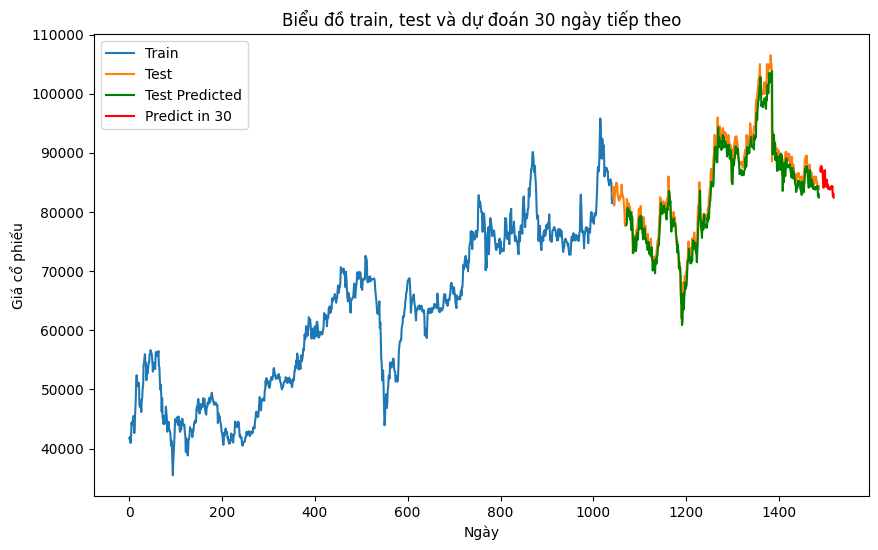

In [123]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [124]:
y_test_pred

array([[ 77757.04 ],
       [ 78000.31 ],
       [ 79700.805],
       [ 80685.58 ],
       [ 79292.88 ],
       [ 80117.32 ],
       [ 80311.8  ],
       [ 80022.93 ],
       [ 78734.06 ],
       [ 79961.38 ],
       [ 78277.74 ],
       [ 76911.92 ],
       [ 79292.125],
       [ 79018.44 ],
       [ 76163.164],
       [ 73054.57 ],
       [ 73522.74 ],
       [ 73980.42 ],
       [ 75045.58 ],
       [ 75689.53 ],
       [ 73603.09 ],
       [ 73372.016],
       [ 74441.766],
       [ 76434.35 ],
       [ 75774.81 ],
       [ 75295.16 ],
       [ 76976.62 ],
       [ 77046.23 ],
       [ 78787.74 ],
       [ 79225.04 ],
       [ 77150.77 ],
       [ 77472.98 ],
       [ 79329.52 ],
       [ 79051.83 ],
       [ 77034.2  ],
       [ 76902.25 ],
       [ 75452.11 ],
       [ 75347.16 ],
       [ 75796.82 ],
       [ 77270.94 ],
       [ 75865.49 ],
       [ 75497.3  ],
       [ 75625.33 ],
       [ 74700.86 ],
       [ 75044.29 ],
       [ 74756.414],
       [ 73560.41 ],
       [ 7482

In [125]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




13/13 [==============================] - 0s 667us/step


In [126]:
y_test1

array([[ 78400.],
       [ 82200.],
       [ 81800.],
       [ 80500.],
       [ 81500.],
       [ 81500.],
       [ 80900.],
       [ 79900.],
       [ 81000.],
       [ 79400.],
       [ 77900.],
       [ 80000.],
       [ 80000.],
       [ 77000.],
       [ 73000.],
       [ 74200.],
       [ 76000.],
       [ 75400.],
       [ 76000.],
       [ 75300.],
       [ 74400.],
       [ 75600.],
       [ 77000.],
       [ 76700.],
       [ 77400.],
       [ 78000.],
       [ 78900.],
       [ 80500.],
       [ 79000.],
       [ 77500.],
       [ 79700.],
       [ 81000.],
       [ 79200.],
       [ 77800.],
       [ 77700.],
       [ 76400.],
       [ 77000.],
       [ 76500.],
       [ 79100.],
       [ 76100.],
       [ 76000.],
       [ 77700.],
       [ 76000.],
       [ 75900.],
       [ 75000.],
       [ 74900.],
       [ 76300.],
       [ 75500.],
       [ 74800.],
       [ 74000.],
       [ 74100.],
       [ 74000.],
       [ 72800.],
       [ 75500.],
       [ 74000.],
       [ 7

In [127]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 1.994
MAE: 1703.956
RMSE: 2169.734
MSLE: 0.025
-------------------
